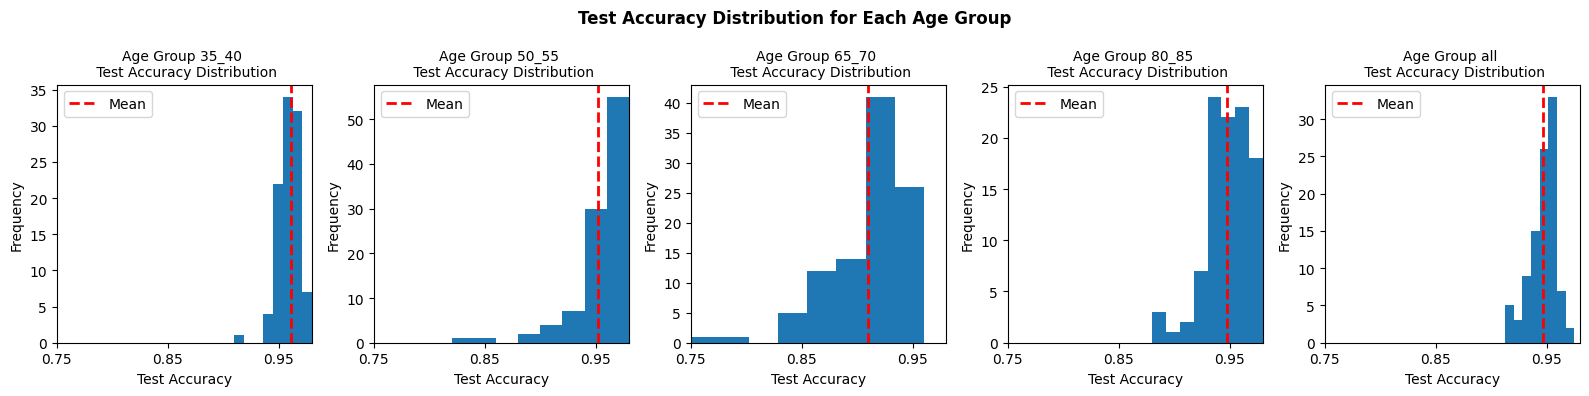

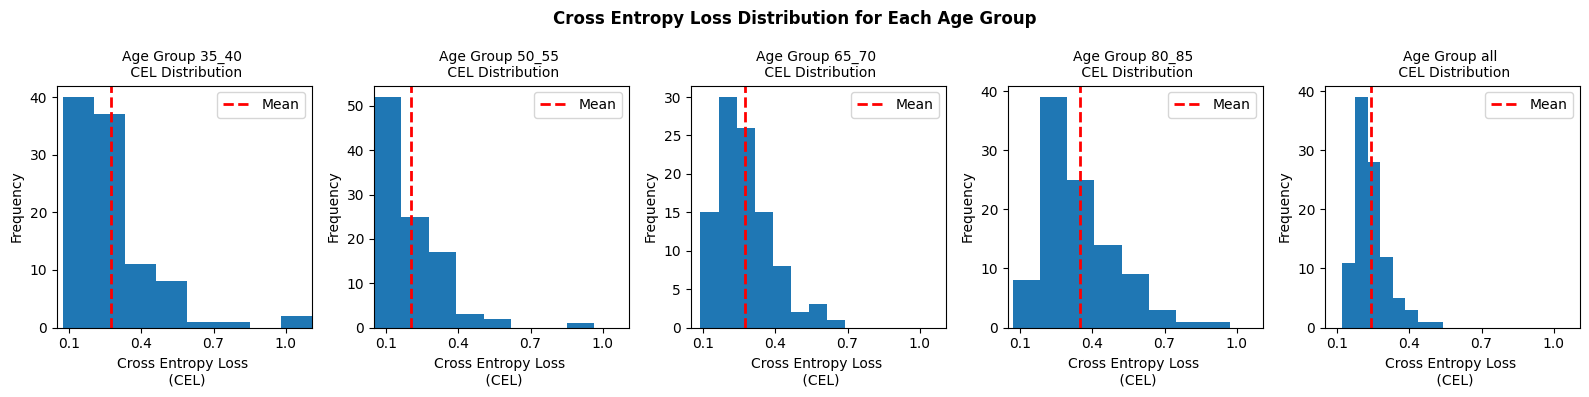

In [1]:
import numpy as np
import matplotlib.pyplot as plt

filenames = ['35_40', '50_55', '65_70', '80_85', 'all']
data = np.empty((100, 0))
for filename in filenames:
    dat = np.loadtxt(f"{filename}.txt", dtype = float)
    data = np.concatenate([data, dat], axis = 1)


xmax = np.max([np.max(data[:, 2*i]) for i in range(5)])
xmin = np.min([np.min(data[:, 2*i]) for i in range(5)])

fig, axes = plt.subplots(1, 5, figsize=(16, 4))
for i in range(5):
    axes[i].hist(data[:,2 * i], bins=8)
    axes[i].set_title(f"Age Group {filenames[i]} \n Test Accuracy Distribution", fontsize = 10)
    axes[i].axvline(np.mean(data[:,2 * i]), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[i].legend()
    axes[i].set_xlim([xmin, xmax])
    axes[i].set_xticks([0.75, 0.85, 0.95])
    axes[i].set_xlabel("Test Accuracy")
    axes[i].set_ylabel("Frequency")
plt.suptitle("Test Accuracy Distribution for Each Age Group", fontweight = 'bold')    
plt.tight_layout()    
plt.show()


xmax = np.max([np.max(data[:, 2*i+1]) for i in range(5)])
xmin = np.min([np.min(data[:, 2*i+1]) for i in range(5)])

fig, axes = plt.subplots(1, 5, figsize=(16, 4))
for i in range(5):
    axes[i].hist(data[:,2 * i + 1], bins=8)
    axes[i].set_title(f"Age Group {filenames[i]} \n CEL Distribution", fontsize = 10)
    axes[i].axvline(np.mean(data[:,2 * i + 1]), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[i].legend()
    axes[i].set_xlim([xmin, xmax])
    axes[i].set_xticks([0.1, 0.4, 0.7, 1.0])
    axes[i].set_xlabel("Cross Entropy Loss \n (CEL)")
    axes[i].set_ylabel("Frequency")
plt.suptitle("Cross Entropy Loss Distribution for Each Age Group", fontweight = 'bold')
plt.tight_layout()        
plt.show()


filenames = ['35_40', '50_55', '65_70', 'all', '80_85']
data = np.empty((100, 0))
for filename in filenames:
    dat = np.loadtxt(f"{filename}.txt", dtype = float)
    data = np.concatenate([data, dat], axis = 1)
######################################################
#accuracy
hamilton_path = [0, 1, 2, 4, 3, 0, 2, 3, 1, 4, 0]
colors = ['purple', 'grey', 'blue', 'green', 'brown']
dataham = [data[:,2*i] for i in hamilton_path]
fig, ax = plt.subplots(dpi = 1500, figsize=(8, 5)) 
bp = ax.boxplot(dataham, patch_artist=True, whis = 1.5) ######################################
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[hamilton_path[i]])
    patch.set_edgecolor('black')


names = ['35-40', '50-55', '65-70', 'All', '80-85']
ax.set_xticklabels([names[i] for i in hamilton_path], rotation=45)
ax.set_ylabel("Test Accuracy")
ax.set_title("Boxplot of Test Accuracy for Each Age Group", fontweight = 'bold')    
plt.show()



dataham = [data[:,2*i+1] for i in hamilton_path]
fig, ax = plt.subplots(dpi = 1500, figsize=(8, 5))
bp = ax.boxplot(dataham, patch_artist=True, whis = 2) ######################################
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[hamilton_path[i]])
    patch.set_edgecolor('black')


ax.set_xticklabels([names[i] for i in hamilton_path], rotation=45)
ax.set_ylabel("Cross Entropy Loss") 
ax.set_title("Boxplot of Cross Entropy Loss for Each Age Group", fontweight = 'bold')      
plt.show()

In [6]:
from scipy import stats
#two by two
filenames = ['35_40', '50_55', '65_70', '80_85', 'all']
data = np.empty((100, 0))
for filename in filenames:
    dat = np.loadtxt(f"{filename}.txt", dtype = float)
    data = np.concatenate([data, dat], axis = 1)



pval_mtx_tbt = np.zeros([5,5])
for i in range(5):
    for j in range(5):
        if i == j:
            pval_mtx_tbt[i,j] = 1
        else:
            f_stat, p_value = stats.f_oneway(data[:,i], data[:,j])
            pval_mtx_tbt[i,j] = np.round(p_value,5)

print(pval_mtx_tbt)

# each vs all
pval_mtx_eva = np.zeros(4)
for i in [0,1,2,3]:
    f_stat, p_value = stats.f_oneway(data[:,i], data[:,4])
    pval_mtx_eva[i] = np.round(p_value,5)
        

print(pval_mtx_eva)

f_stat, p_value = stats.f_oneway(data[:,0], data[:,1], data[:,2], data[:,3], data[:,4])
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


[[1.      0.      0.00216 0.      0.     ]
 [0.      1.      0.      0.00139 0.     ]
 [0.00216 0.      1.      0.      0.     ]
 [0.      0.00139 0.      1.      0.     ]
 [0.      0.      0.      0.      1.     ]]
[0. 0. 0. 0.]
F-statistic: 1389.6564421650899
P-value: 1.6763593199932468e-267
